## Task: 
Classify all countries in the world in 10 different groups according to the distance between them and their GDP (Gross Domestic Product) per capita. 

In [1]:
#! pip install haversine

#!pip install pandas-datareader
#https://pandas-datareader.readthedocs.io/en/latest/readers/world-bank.html

#!pip install kneed

In [2]:
#import lybraries
import pandas as pd
import matplotlib as plt
import seaborn as sns

#import data reader to get data
import pandas_datareader.wb as wb

#import haversine
from haversine import haversine

#Clustering
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
wb.search('gdp')

,id,name,unit,source,sourceNote,sourceOrganization,topics
675,5.51.01.10.gdp,Per capita GDP growth,,Statistical Capacity Indicators,GDP per capita is the sum of gross value added...,b'World Development Indicator (WDI) databank. ...,
677,6.0.GDP_current,GDP (current $),,LAC Equity Lab,GDP is the sum of gross value added by all res...,b'World Development Indicators (World Bank)',Economy & Growth
678,6.0.GDP_growth,GDP growth (annual %),,LAC Equity Lab,Annual percentage growth rate of GDP at market...,b'World Development Indicators (World Bank)',Economy & Growth
679,6.0.GDP_usd,GDP (constant 2005 $),,LAC Equity Lab,GDP is the sum of gross value added by all res...,b'World Development Indicators (World Bank)',Economy & Growth
680,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
...,...,...,...,...,...,...,...
13645,UIS.XUNIT.GDPCAP.23.FSGOV,Initial government funding per secondary stude...,,Education Statistics,"Total general (local, regional and central, cu...",b'UNESCO Institute for Statistics',
13646,UIS.XUNIT.GDPCAP.23.FSHH,Initial household funding per secondary studen...,,Education Statistics,"Total payments of households (pupils, students...",b'UNESCO Institute for Statistics',
13647,UIS.XUNIT.GDPCAP.3.FSGOV,Initial government funding per upper secondary...,,Education Statistics,"Total general (local, regional and central, cu...",b'UNESCO Institute for Statistics',
13648,UIS.XUNIT.GDPCAP.5T8.FSGOV,Initial government funding per tertiary studen...,,Education Statistics,"Total general (local, regional and central, cu...",b'UNESCO Institute for Statistics',


In [4]:
#reading data
gdp_data = wb.WorldBankReader(symbols=['NY.GDP.MKTP.CD', 'NY.GDP.PCAP.CD'], countries='all')

In [5]:
#Get data Frame
gdp_df = gdp_data.read()
gdp_df.head(10)

NY.GDP.MKTP.CD  NY.GDP.PCAP.CD
country                year                                
Arab World             2020             NaN             NaN
                       2019    2.815410e+12     6580.056257
                       2018    2.772025e+12     6603.351190
                       2017    2.513494e+12     6102.211067
                       2016    2.463434e+12     6097.239025
                       2015    2.529694e+12     6387.660615
Caribbean small states 2020             NaN             NaN
                       2019    7.629037e+10    10307.586281
                       2018    7.345916e+10     9982.268089
                       2017    6.991314e+10     9557.517493

In [6]:
#rename columns and reset index
gdp_df.columns = ['gdp', 'gdp_pc']
gdp_df_reind = gdp_df.reset_index()

In [7]:
#Let's use the last valid year for each country
#years = gdp_df_reind.dropna().groupby('country')['year'].max()

In [8]:
#pick only 2019 and reset index
gdp_df_final = gdp_df_reind[gdp_df_reind['year']=='2019'].dropna()
gdp_df_final.reset_index(inplace=True, drop=True)

In [9]:
geo_df = wb.get_countries()[['name', 'latitude', 'longitude']]
geo_df.head()

,name,latitude,longitude
0,Aruba,12.51670,-70.0167
1,Afghanistan,34.52280,69.1761
2,Africa,NaN,NaN
3,Angola,-8.81155,13.2420
4,Albania,41.33170,19.8172


In [10]:
#change columns names and merge
geo_df.columns = ['country', 'lat', 'lng']

final_df = pd.merge(
    gdp_df_final,
    geo_df,
    how='inner',
    on='country'
).dropna().reset_index(drop=True)

final_df[20:40]

,country,year,gdp,gdp_pc,lat,lng
20,Bosnia and Herzegovina,2019,2.004785e+10,6073.265203,43.86070,18.42140
21,Botswana,2019,1.834051e+10,7961.338140,-24.65440,25.92010
22,Brazil,2019,1.839758e+12,8717.186278,-15.78010,-47.92920
23,Brunei Darussalam,2019,1.346942e+10,31086.751079,4.94199,114.94600
24,Bulgaria,2019,6.792718e+10,9737.601351,42.71050,23.32380
25,Burkina Faso,2019,1.574581e+10,774.839690,12.36050,-1.53395
26,Burundi,2019,3.012335e+09,261.247473,-3.37840,29.36390
27,Cabo Verde,2019,1.981846e+09,3603.781794,14.92180,-23.50870
28,Cambodia,2019,2.708939e+10,1643.121389,11.55560,104.87400
29,Cameroon,2019,3.876047e+10,1497.909176,3.87210,11.51740


In [11]:
#Delete all after ',' and duplicates
final_df['country'] = final_df['country'].str.split(',').str[0].str.replace(',', '')
final_df = final_df[~final_df['country'].duplicated()].reset_index(drop=True)

&lt;matplotlib.axes._subplots.AxesSubplot at 0x223fe2f5c10&gt;

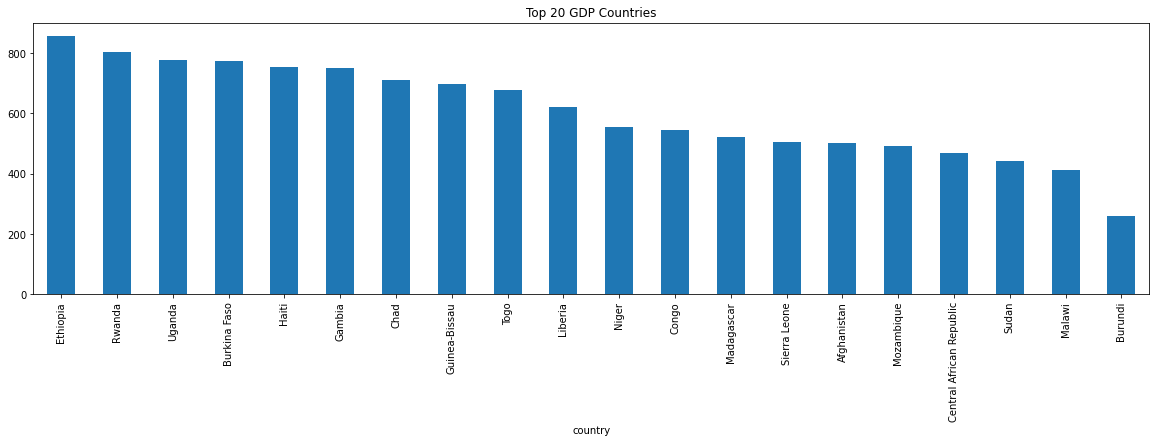

In [12]:
final_df[['country', 'gdp_pc']].sort_values(by='gdp_pc', ascending=False)[-20:].plot(
    kind = 'bar',
    x = 'country',
    y= 'gdp_pc',
    title = 'Top 20 GDP Countries',
    legend = False,
    figsize = (20, 5)
)

## haversine

In [13]:
#Get distance Betwen Countries
final_df['geom'] = list(final_df[['lat', 'lng']].itertuples(index=False, name=None))
final_df

for coun in final_df.country:
    act_geo = final_df['geom'][final_df['country'] == coun].iloc[0]
    final_df[coun] = final_df['geom'].apply(lambda x: haversine(act_geo, x))

In [14]:
#final_df.to_csv('output/df.csv')

# Clustering

In [15]:
#drop unnecesary columns
df_to_model = final_df.drop(['year', 'gdp', 'lat', 'lng', 'geom' ], axis=1)
df_to_model.head()

,country,gdp_pc,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vanuatu,Vietnam,Zambia,Zimbabwe
0,Afghanistan,502.115487,0.000000,4335.759348,5857.996337,5796.749775,7598.080170,12285.650998,15273.354886,2260.614600,...,3575.966386,1813.273544,5707.875995,11142.137819,15075.240932,754.213399,11931.425137,3879.591872,7033.284086,7079.409605
1,Albania,5352.857411,4335.759348,0.000000,1532.472299,1516.402481,5616.083647,8076.784454,11611.533654,2077.162753,...,1306.049532,3694.930144,1891.288239,7763.972118,11470.408316,4071.830219,16034.265281,8162.637755,6368.160133,6680.060719
2,Algeria,3948.343279,5857.996337,1532.472299,0.000000,654.553001,5175.638782,6664.461834,10165.257005,3597.503085,...,2661.002208,5034.754058,1660.361251,6796.272681,10038.359633,5602.807622,17456.539695,9695.086370,6373.392826,6742.848614
3,Andorra,40886.391165,5796.749775,1516.402481,654.553001,0.000000,5829.436880,6563.050755,10517.018159,3560.122180,...,2369.699990,5198.708476,1007.651669,6387.830649,10405.693052,5451.477026,16991.283496,9547.169072,6997.144770,7360.618382
4,Angola,2973.591160,7598.080170,5616.083647,5175.638782,5829.436880,0.000000,8738.015146,7777.475969,6322.088260,...,6798.064264,5795.679326,6827.956334,10644.770822,7565.380851,7974.600383,15989.131092,10623.244971,1791.752437,2171.481799


&lt;matplotlib.axes._subplots.AxesSubplot at 0x223fc1a0760&gt;

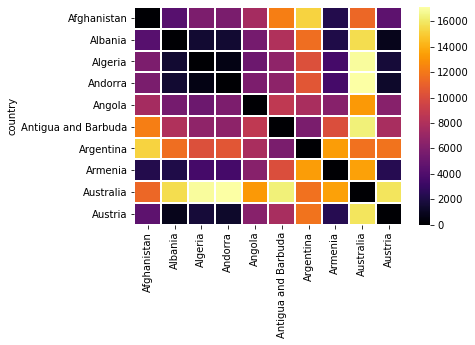

In [16]:
plot = df_to_model.drop(['gdp_pc'], axis=1).set_index('country')

sns.heatmap(
    plot.iloc[0:10, 0:10],
    #figsize=(10,10),
    cmap='inferno',
    linewidth=1
)

In [17]:
#df_to_model['gdp_groups'] = pd.qcut(df_to_model['gdp_pc'], 4, labels=['low', 'lower-middle', 'upper-middle', 'high'])

# Kmeans

In [18]:
# Scaling
features_df = df_to_model.set_index('country')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)

In [19]:
 kmeans = KMeans(
     init="random",
     n_clusters=10,
     max_iter=300,
     random_state=42
 )

In [20]:
kmeans.fit(scaled_features)

KMeans(init=&#39;random&#39;, n_clusters=10, random_state=42)

In [21]:
kmeans.labels_

array([5, 6, 6, 6, 0, 7, 7, 8, 3, 6, 8, 9, 8, 5, 7, 6, 4, 9, 2, 7, 6, 0,
       7, 1, 6, 2, 0, 2, 1, 2, 9, 0, 2, 7, 1, 9, 0, 0, 9, 2, 6, 8, 6, 4,
       8, 7, 7, 9, 8, 9, 2, 4, 0, 8, 3, 4, 4, 2, 2, 8, 4, 2, 6, 7, 9, 2,
       2, 7, 9, 9, 1, 6, 4, 5, 1, 8, 4, 8, 6, 9, 1, 8, 5, 0, 3, 1, 6, 8,
       5, 1, 4, 8, 0, 2, 6, 4, 4, 1, 0, 0, 1, 5, 2, 6, 2, 0, 9, 6, 5, 6,
       6, 0, 1, 0, 3, 5, 4, 3, 9, 2, 2, 6, 4, 8, 5, 9, 3, 7, 9, 1, 6, 6,
       7, 8, 6, 4, 0, 3, 2, 8, 2, 6, 0, 2, 1, 6, 6, 3, 0, 6, 5, 7, 7, 7,
       8, 7, 4, 4, 5, 0, 1, 1, 2, 7, 6, 6, 3, 0, 6, 8, 4, 9, 7, 5, 3, 1,
       0, 0])

In [ ]:
Map Plotting

## Creating Columns

In [22]:
#select columns
df_to_order = df_to_model.iloc[:,0:2]

#add group label
df_to_order['group_label'] = kmeans.labels_

#group’s average GDP per capita
group_means = df_to_order.groupby('group_label')['gdp_pc'].mean()
df_to_order['gdpc_mean'] = df_to_order['group_label'].apply(lambda x: group_means[x])

#total gdp
df_to_order['gdp'] = final_df['gdp']

#reordering columns
df_to_order = df_to_order[['country', 'group_label', 'gdpc_mean', 'gdp_pc', 'gdp']]
df_to_order

,country,group_label,gdpc_mean,gdp_pc,gdp
0,Afghanistan,5,3282.728324,502.115487,1.910135e+10
1,Albania,6,15312.083263,5352.857411,1.527808e+10
2,Algeria,6,15312.083263,3948.343279,1.699882e+11
3,Andorra,6,15312.083263,40886.391165,3.154058e+09
4,Angola,0,3183.785976,2973.591160,9.463542e+10
...,...,...,...,...,...
173,Uzbekistan,5,3282.728324,1724.841134,5.792129e+10
174,Vanuatu,3,13066.929755,3058.065675,9.170589e+08
175,Vietnam,1,21742.611481,2715.276036,2.619212e+11
176,Zambia,0,3183.785976,1291.343357,2.306472e+10


# Sorting

In [23]:
ordered_df = df_to_order.sort_values(by=['gdpc_mean', 'gdp'], ascending = False)
ordered_df.set_index('country')

,group_label,gdpc_mean,gdp_pc,gdp
country,,,,
Germany,4,51646.826030,46258.878290,3.845630e+12
United Kingdom,4,51646.826030,42300.267126,2.827113e+12
France,4,51646.826030,40493.928572,2.715518e+12
Russian Federation,4,51646.826030,11584.995383,1.699877e+12
Netherlands,4,51646.826030,52447.831439,9.090704e+11
...,...,...,...,...
Liberia,2,1962.049258,621.892954,3.070518e+09
Cabo Verde,2,1962.049258,3603.781794,1.981846e+09
Gambia,2,1962.049258,751.294688,1.763819e+09


## Cumulative GDP fraction

In [32]:
#Get GDP sum of each group ang assign it to a coulumn
gdp_sum = ordered_df.groupby('group_label')['gdp'].sum()
ordered_df['sum'] = ordered_df['group_label'].apply(lambda x: gdp_sum[x])

#get the GDP fraction of each country in the group
ordered_df['fraction'] = ordered_df['gdp']/ordered_df['sum']

# fraction cumsum of each group
cum_sum = []
for x in ordered_df['group_label'].unique(): #unique labels
    cum_group = ordered_df[ordered_df['group_label']== x]['fraction'].cumsum() 
    cum_sum = cum_sum + cum_group.values.tolist()

#Create Column and drop unused ones
ordered_df['cum_sum'] = cum_sum
ordered_df.drop(['sum', 'fraction'], axis=1, inplace=True)
ordered_df.reset_index(drop=True, inplace=True)
ordered_df

,country,group_label,gdpc_mean,gdp_pc,gdp,cum_sum
0,Germany,4,51646.826030,46258.878290,3.845630e+12,0.249966
1,United Kingdom,4,51646.826030,42300.267126,2.827113e+12,0.433728
2,France,4,51646.826030,40493.928572,2.715518e+12,0.610237
3,Russian Federation,4,51646.826030,11584.995383,1.699877e+12,0.720729
4,Netherlands,4,51646.826030,52447.831439,9.090704e+11,0.779818
...,...,...,...,...,...,...
173,Liberia,2,1962.049258,621.892954,3.070518e+09,0.992884
174,Cabo Verde,2,1962.049258,3603.781794,1.981846e+09,0.995441
175,Gambia,2,1962.049258,751.294688,1.763819e+09,0.997717
176,Guinea-Bissau,2,1962.049258,697.784403,1.340389e+09,0.999446
